In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/hearing_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

,count
test_result,
1,3000
0,2000


<Axes: xlabel='test_result', ylabel='count'>

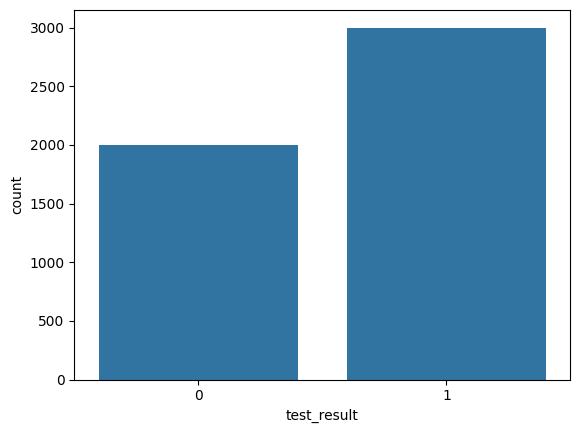

In [8]:
sns.countplot(data = df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

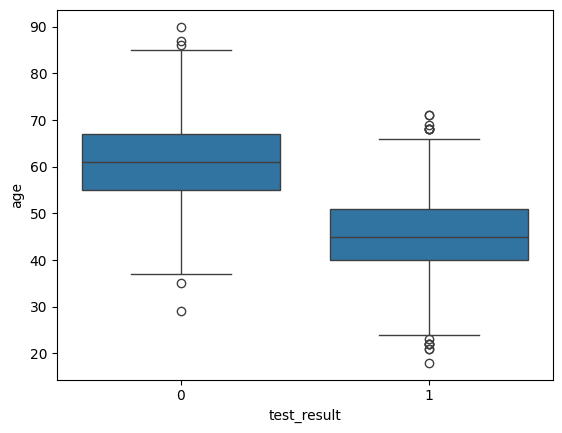

In [9]:
sns.boxplot(data=df,x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

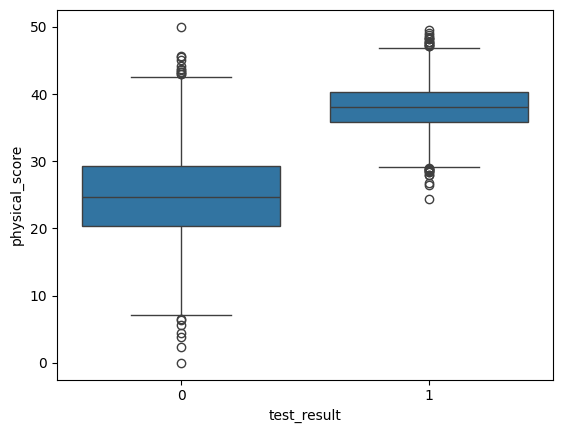

In [10]:
sns.boxplot(data=df,x='test_result',y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

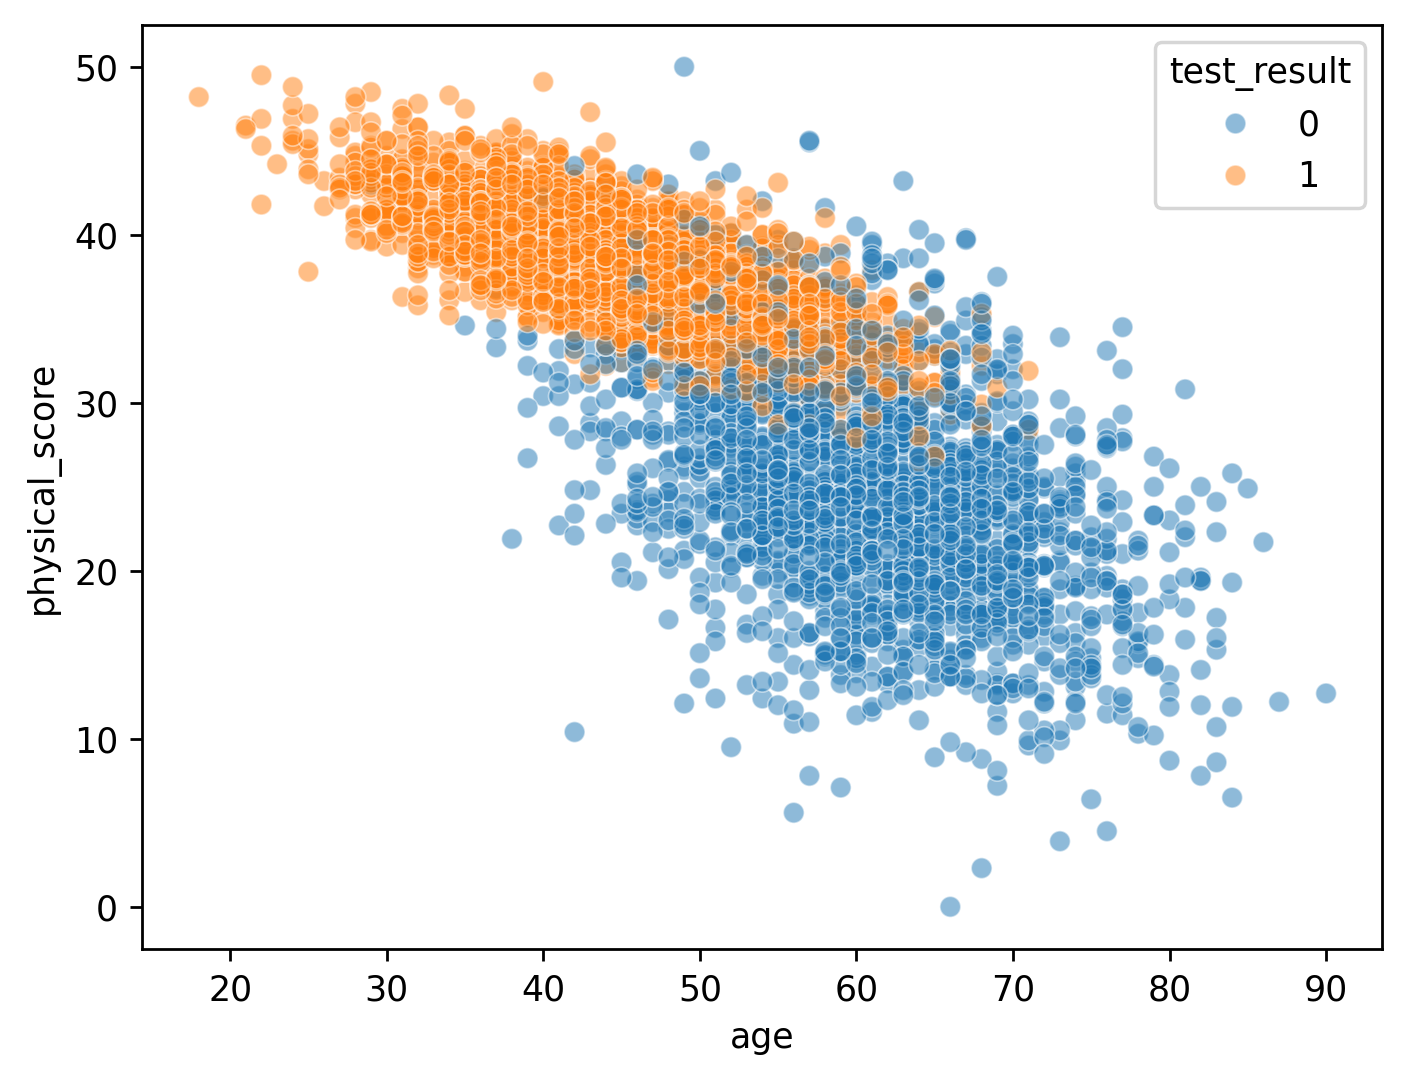

In [15]:
plt.figure(dpi=250)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5)

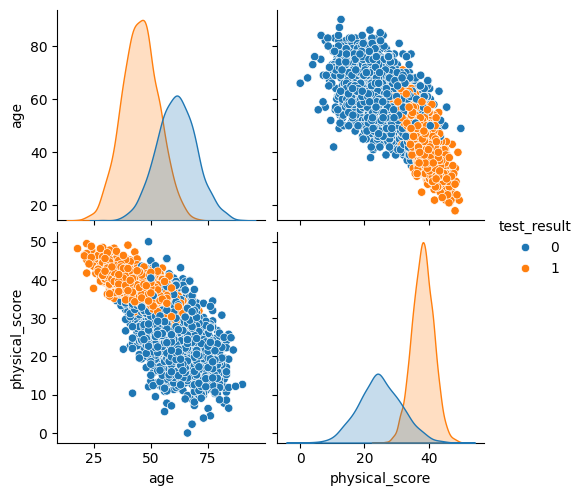

In [17]:
sns.pairplot(df,hue='test_result')

<Axes: >

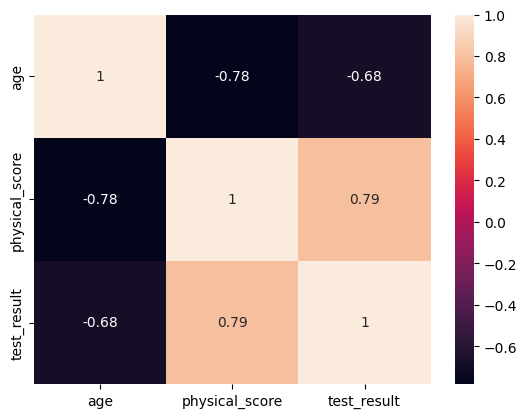

In [18]:
sns.heatmap(df.corr(),
            annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

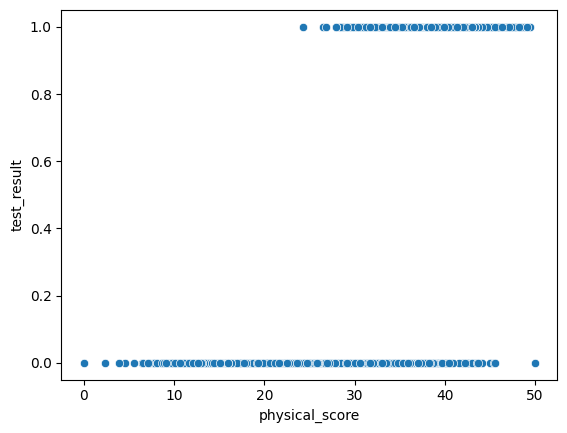

In [19]:
sns.scatterplot(data=df,x='physical_score',y='test_result')

In [20]:
from mpl_toolkits.mplot3d import Axes3D

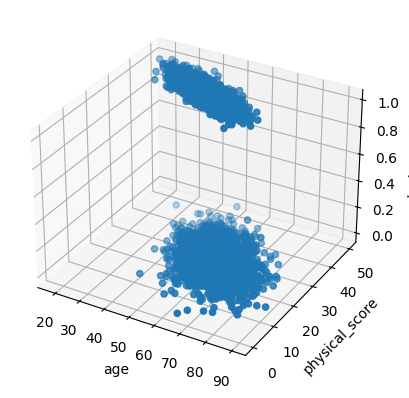

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.set_xlabel('age')
ax.set_ylabel('physical_score')
ax.set_zlabel('test_result')

ax.scatter(df['age'],df['physical_score'],df['test_result'])

In [26]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [33]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [39]:
model.fit(X_train_t,y_train)

LogisticRegression()

In [40]:
model.coef_

array([[-0.95017725,  3.46148946]])

In [42]:
y_pred = model.predict(X_test_t)

In [ ]:
y_pred = model.predict_proba(X_test_t)

In [41]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [43]:
accuracy_score(y_test,y_pred)

0.93

In [44]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [48]:
pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.924731,0.933121,0.93,0.928926,0.929883
recall,0.891192,0.954397,0.93,0.922795,0.930000
f1-score,0.907652,0.943639,0.93,0.925646,0.929748
support,193.000000,307.000000,0.93,500.000000,500.000000


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

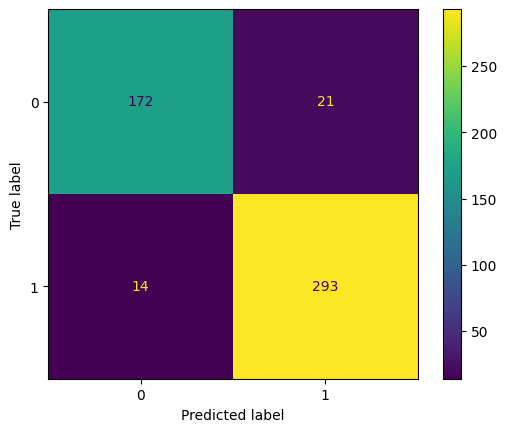

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [60]:
from sklearn.metrics import precision_score, recall_score

In [61]:
precision_score(y_test,y_pred)

0.9331210191082803

In [62]:
recall_score(y_test,y_pred)

0.9543973941368078

In [70]:
from sklearn.metrics import RocCurveDisplay,  PrecisionRecallDisplay

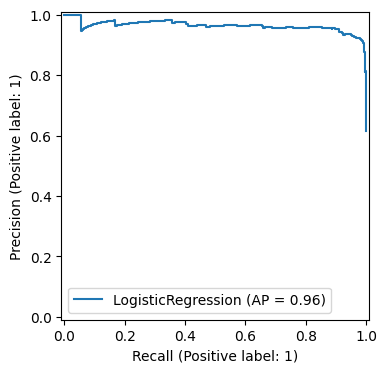

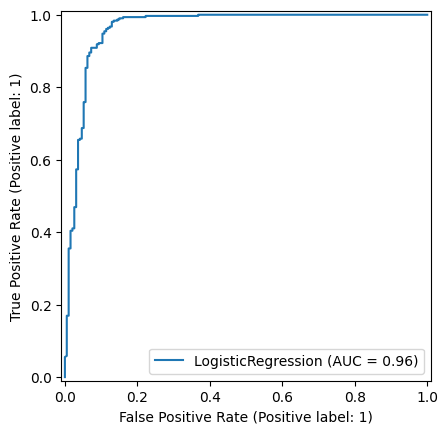

In [75]:
fig,ax = plt.subplots(figsize=(4,4))
PrecisionRecallDisplay.from_estimator(model,X_test_t,y_test,ax=ax)
RocCurveDisplay.from_estimator(model,X_test_t,y_test)

In [77]:
model.predict_proba(X_test_t)[0]

array([0.02380517, 0.97619483])

In [78]:
y_test[0]

np.int64(1)